In [ ]:
#importing 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv("Fashion_Retail_Sales.csv")
df["Review Rating"] = df["Review Rating"].fillna(df["Review Rating"].median())

In [ ]:
unique_items = df['Item Purchased'].dropna().unique()

# Print them
print("Unique items:")
for item in unique_items:
    print(item)

Unique items:
Handbag
Tunic
Tank Top
Leggings
Wallet
Onesie
Jacket
Trousers
Jeans
Loafers
Slippers
Bowtie
Pajamas
Trench Coat
Poncho
Gloves
Romper
T-shirt
Flip-Flops
Shorts
Blazer
Boots
Belt
Hoodie
Sweater
Blouse
Swimsuit
Kimono
Cardigan
Socks
Pants
Scarf
Backpack
Dress
Camisole
Sneakers
Flannel Shirt
Tie
Polo Shirt
Umbrella
Hat
Sun Hat
Overalls
Coat
Sunglasses
Vest
Sandals
Jumpsuit
Raincoat
Skirt


In [ ]:
i_avg = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean()
for i in i_avg:
  print(i)

112.14545454545454
151.94202898550725
184.90740740740742
183.71929824561403
228.67307692307693
197.8409090909091
98.96774193548387
151.9672131147541
106.8076923076923
93.3409090909091
102.37735849056604
275.8292682926829
237.1153846153846
214.71186440677965
103.26785714285714
154.5
157.98
272.25
114.21739130434783
149.672131147541
165.0408163265306
183.41666666666666
161.84745762711864
103.22222222222223
209.80327868852459
130.91549295774647
105.95348837209302
190.36666666666667
123.21818181818182
197.10416666666666
118.53191489361703
155.5084745762712
171.64864864864865
105.1
245.30434782608697
109.08474576271186
136.15254237288136
97.07142857142857
93.13559322033899
213.13725490196077
184.20408163265307
143.53968253968253
125.6969696969697
103.1086956521739
178.42857142857142
161.45
319.9074074074074
107.68518518518519
106.72413793103448
156.2


In [ ]:
df["Purchase Amount (USD)"] = df["Purchase Amount (USD)"].fillna(df["Item Purchased"].map(i_avg))

In [ ]:
from google.colab import files
df.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("fifa21.csv")
df = df.replace(r'€★', '', regex=True)
df["Hits"] = pd.to_numeric(df["Hits"], errors='coerce').fillna(0).astype(int)
df["Hits"] = df["Hits"].fillna(df["Hits"].median())


df.to_csv("updated_fifa21.csv", index=False)




<ipython-input-48-4c56d1784075>:1: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21.csv")


In [ ]:
def k(value):
    if isinstance(value, str) and value.endswith('K'):
        return float(value[:-1]) * 1000
    try:
        return float(value)
    except:
        return value

df['Hits'] = df['Hits'].apply(k)

In [ ]:
df.to_csv("updated_fifa21.csv", index=False)


In [ ]:
from google.colab import files
df.to_csv("updated_fifa21.csv", index=False)
files.download("updated_fifa21.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-50-ee36160ee4a8>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=foot_counts.values, y=foot_counts.index, ax=axes[1, 0], palette="Set2")


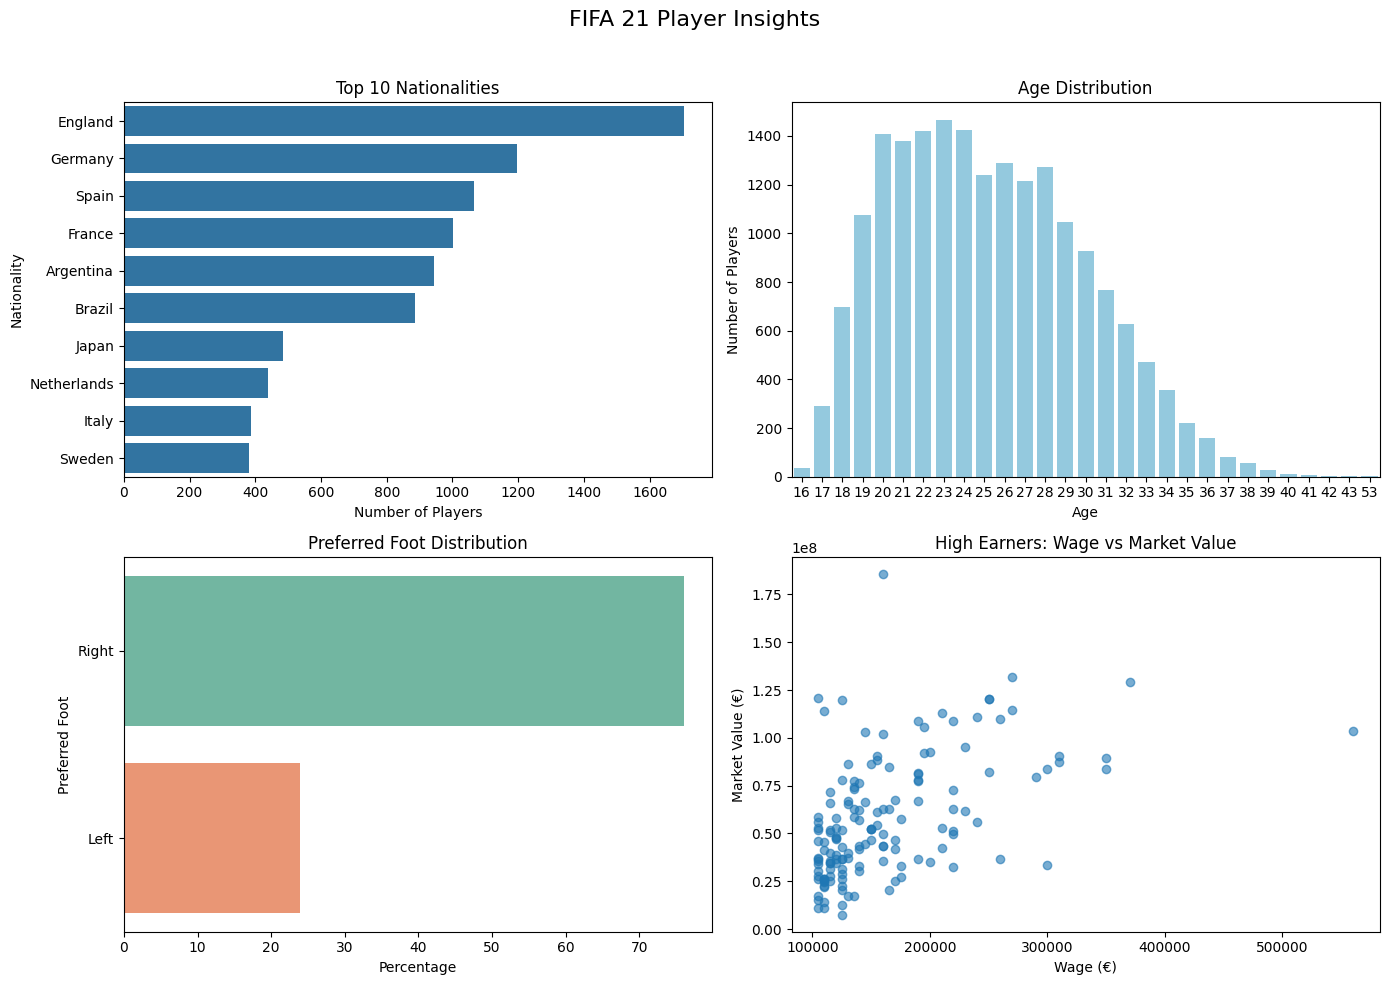

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("updated_fifa21.csv", low_memory=False)

# Drop unnecessary columns
unnecessary_columns = [
    'ID', 'Photo', 'Flag', 'Club Logo', 'Work Rate', 'Real Face', 'Body Type',
    'PlayerUrl', 'Contract Valid Until', 'Joined', 'Loaned From', 'Release Clause'
]
df.drop(columns=[col for col in unnecessary_columns if col in df.columns], inplace=True)

# Remove special characters
df.replace({r'[★€\n\r\t]': ''}, regex=True, inplace=True)

# Drop rows with less than 98% completeness
df_cleaned = df.dropna(thresh=int(0.98 * df.shape[1]))

# Convert currency columns
def clean_currency(val):
    if isinstance(val, str):
        val = val.replace('€', '').replace('K', 'e3').replace('M', 'e6')
        try:
            return float(eval(val))
        except:
            return None
    return val

df_cleaned['Wage (EUR)'] = df_cleaned['Wage'].apply(clean_currency)
df_cleaned['Value (EUR)'] = df_cleaned['Value'].apply(clean_currency)

# Insights
top_nations = df_cleaned['Nationality'].value_counts().head(10)
age_counts = df_cleaned['Age'].value_counts().sort_index()
foot_counts = df_cleaned['Preferred Foot'].value_counts(normalize=True) * 100
high_earners = df_cleaned[df_cleaned['Wage (EUR)'] > 100_000]
valuable_players = high_earners[high_earners['Value (EUR)'] > 5_000_000]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("FIFA 21 Player Insights", fontsize=16)

# Top Nationalities
sns.barplot(x=top_nations.values, y=top_nations.index, ax=axes[0, 0])
axes[0, 0].set_title("Top 10 Nationalities")
axes[0, 0].set_xlabel("Number of Players")

# Age Distribution
sns.barplot(x=age_counts.index, y=age_counts.values, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title("Age Distribution")
axes[0, 1].set_ylabel("Number of Players")

# Preferred Foot
sns.barplot(x=foot_counts.values, y=foot_counts.index, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Preferred Foot Distribution")
axes[1, 0].set_xlabel("Percentage")

# Wage vs Market Value
axes[1, 1].scatter(high_earners['Wage (EUR)'], high_earners['Value (EUR)'], alpha=0.6)
axes[1, 1].set_title("High Earners: Wage vs Market Value")
axes[1, 1].set_xlabel("Wage (€)")
axes[1, 1].set_ylabel("Market Value (€)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


from google.colab import files
df.to_csv("updated_fifa21.csv", index=False)
files.download("updated_fifa21.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("updated_fifa21.csv", low_memory=False)

df = df.dropna(thresh=int(0.98 * df.shape[1]))

# Clean currency columns
def to_num(x):
    if isinstance(x, str):
        x = x.replace('€', '').replace('K', 'e3').replace('M', 'e6')
        try:
            return float(eval(x))
        except:
            return None
    return x



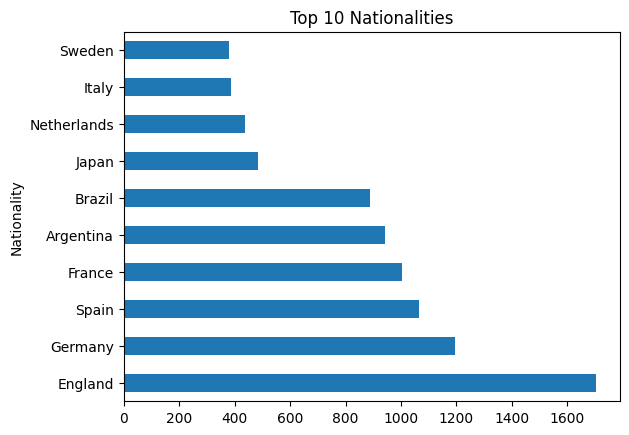

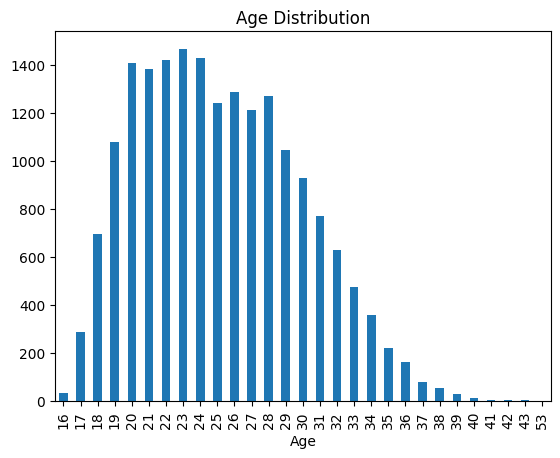

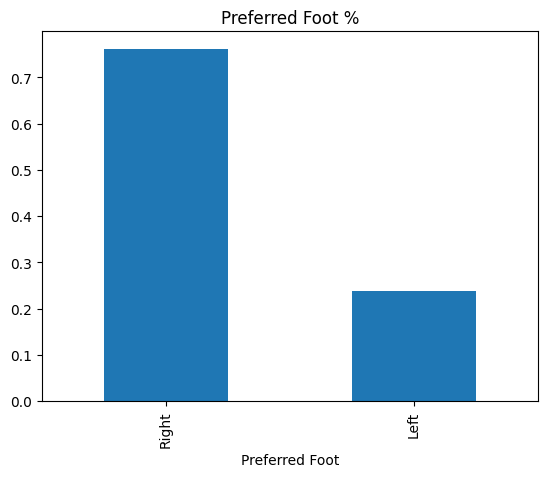

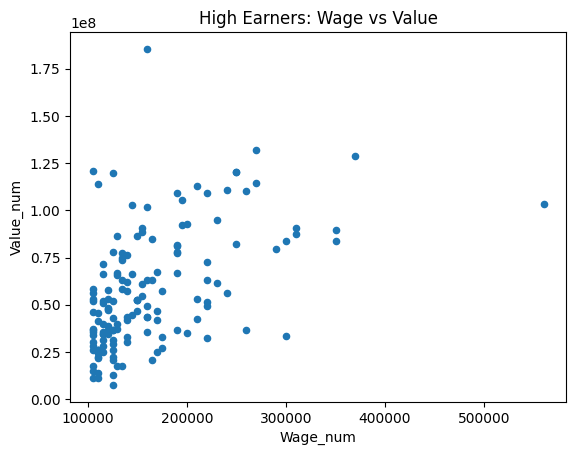

In [ ]:
df['Wage_num'] = df['Wage'].apply(to_num)
df['Value_num'] = df['Value'].apply(to_num)


df['Nationality'].value_counts().head(10).plot(kind='barh', title='Top 10 Nationalities')
plt.show()


df['Age'].value_counts().sort_index().plot(kind='bar', title='Age Distribution')
plt.show()


df['Preferred Foot'].value_counts(normalize=True).plot(kind='bar', title='Preferred Foot %')
plt.show()


df_high = df[df['Wage_num'] > 100000]
df_high.plot.scatter(x='Wage_num', y='Value_num', title='High Earners: Wage vs Value')
plt.show()